# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observation
* As expected, the Temperature and Latitude have a strong correlation. Cities with higher latitude (Closer to the Equator) have a higher temperature.
* There are almost None or so week correlation between Latitude vs Cloudiness, Latitude vs Humidity and Latitude vs Wind Speed in both hemispheres.
* In this time of the year, wind speed in almost all cities in our DataFrame is less than 25 mph in both hemispheres and only a few cities on the Northern Hemisphere have more wind speeds.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/CSV/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setting the base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Using Imperial as Unit for Fahrenheit 
units = "imperial"

# Building partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Setting up lists to hold reponse info
lat = []
lng = []
city_name = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
max_temp =[]
wind_speed = []
errors =[]

# Setting counters for Sets and Records
api_set = 1
api_record = 1


# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities):
    
    # By each call, we will retrieve a set of 50 records
    if( index % 50 == 0 and index >= 50):
        api_set += 1
        api_record = 1
        
    # Filling the Lists if the city was found on the URL
    try:
        response = requests.get(query_url + city).json()
        time.sleep(1)
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        print(f"Processing Record {api_record} of set {api_set} | {city}")
        
        api_record +=1
        
    # Skipping if the city was not found    
    except:
        errors.append(city)
        print(f"{city} not found. Skipping...")
        pass

# To Know whether the Data Retrieval completed or not and how many cities were not found!
print("-----------------------------------------------------------")
print(f" Data Retrieval Completed with {len(errors)} skipped cities.")
print("-----------------------------------------------------------")

tsihombe not found. Skipping...
Processing Record 1 of set 1 | barrow
Processing Record 2 of set 1 | luderitz
Processing Record 3 of set 1 | georgetown
Processing Record 4 of set 1 | ranong
Processing Record 5 of set 1 | saskylakh
Processing Record 6 of set 1 | hithadhoo
grand river south east not found. Skipping...
Processing Record 7 of set 1 | calpulalpan
Processing Record 8 of set 1 | shimanovsk
Processing Record 9 of set 1 | ixtapa
Processing Record 10 of set 1 | fortuna
Processing Record 11 of set 1 | voh
Processing Record 12 of set 1 | severo-kurilsk
Processing Record 13 of set 1 | saint-pierre
Processing Record 14 of set 1 | busselton
Processing Record 15 of set 1 | tiksi
Processing Record 16 of set 1 | khatanga
Processing Record 17 of set 1 | sinnamary
Processing Record 18 of set 1 | port elizabeth
Processing Record 19 of set 1 | namatanai
Processing Record 20 of set 1 | airai
Processing Record 21 of set 1 | avarua
Processing Record 22 of set 1 | atuona
Processing Record 23 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a DataFrame from the gained Info
weather_df = pd.DataFrame({'City': city_name,
                           'Cloudiness': cloudiness,
                           'Country': country,
                           'Date': date,
                           'Humidity': humidity,
                           'Lat': lat,
                           'Lng': lng,
                           'Max Temp': max_temp,
                           'Wind Speed': wind_speed})

# Setting the name for index columns
weather_df.index.names= ["City_ID"]

# Saving the DataFrame as CSV
weather_df.to_csv(output_data_file, header = True, index = True)

# Displaying the DataFrame for the first 100 rows
weather_df.head(100)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Barrow,90,US,1590020832,85,71.29,-156.79,23.00,12.75
1,Lüderitz,0,NA,1590021217,28,-26.65,15.16,68.00,2.24
2,George Town,20,MY,1590021219,88,5.41,100.34,82.40,4.70
3,Ranong,75,TH,1590021220,94,9.97,98.63,78.80,2.24
4,Saskylakh,99,RU,1590020810,92,71.92,114.08,34.47,0.74
...,...,...,...,...,...,...,...,...,...
95,Hilo,20,US,1590021387,65,19.73,-155.09,82.40,11.41
96,Hermanus,14,ZA,1590021388,38,-34.42,19.23,68.02,6.11
97,Cimitarra,43,CO,1590021389,79,6.31,-73.95,78.80,2.82


In [6]:
# Finding the Date of getting Info
api_date= datetime.utcfromtimestamp(weather_df.iloc[0,3]).strftime('%Y-%m-%d')
api_date

'2020-05-21'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

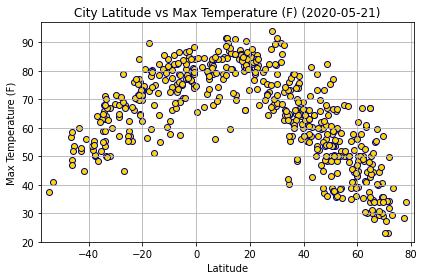

In [7]:
# Setting  X and Y Axis
x = weather_df['Lat']
y = weather_df['Max Temp']

# Creating the Scatter Plot
plt.scatter( x , y, marker = 'o', facecolors = 'gold', edgecolors = 'navy' )

# Setting Title and Labels for X and Y axis
plt.title('City Latitude vs Max Temperature (F)'+ ' ('+ api_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Setting Limitation for X and Y axis
plt.xlim(min(x)-3, max(x)+3)
plt.ylim(min(y)-3, max(y)+3)

# Setting the grid and layout and saving the plot
plt.grid()
plt.tight_layout()
plt.savefig('output_data/Plots/latitude_temperature_plot.png')
plt.show()

##### Explanation: cities closer to the equator (Latitude = 0 ) have higher temperatures

#### Latitude vs. Humidity Plot

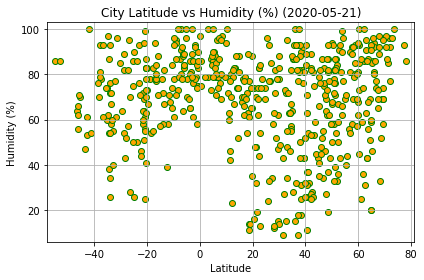

In [8]:
# Setting  X and Y Axis
x = weather_df['Lat']
y = weather_df['Humidity']

# Creating the Scatter Plot
plt.scatter( x , y, marker = 'o', facecolors = 'orange', edgecolors = 'green' )

# Setting Title and Labels for X and Y axis
plt.title('City Latitude vs Humidity (%)'+ ' ('+ api_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Setting Limitation for X and Y axis
plt.xlim(min(x)-3, max(x)+3)
plt.ylim(min(y)-3, max(y)+3)

# Setting the grid and layout and saving the plot
plt.grid()
plt.tight_layout()
plt.savefig('output_data/Plots/latitude_humidity_plot.png')
plt.show()

##### Explanation: There is no significant relationship between Latitude and Humidity. In a given Latitude, there are some cities with a low percentage of Humidity and some with a higher percentage of Humidity.


#### Latitude vs. Cloudiness Plot

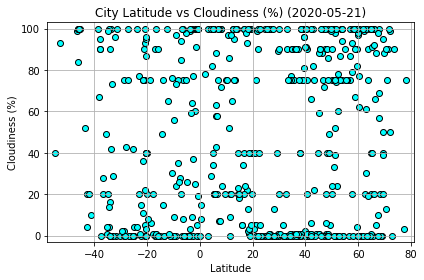

In [9]:
# Setting  X and Y Axis
x = weather_df['Lat']
y = weather_df['Cloudiness']

# Creating the Scatter Plot
plt.scatter( x , y, marker = 'o', facecolors = 'cyan', edgecolors = 'black' )

# Setting Title and Labels for X and Y axis
plt.title('City Latitude vs Cloudiness (%)'+ ' ('+ api_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Setting Limitation for X and Y axis
plt.xlim(min(x)-3, max(x)+3)
plt.ylim(min(y)-3, max(y)+3)

# Setting the grid and layout and saving the plot
plt.grid()
plt.tight_layout()
plt.savefig('output_data/Plots/latitude_cloudiness_plot.png')
plt.show()

##### Explanation: There is no relation between Latitude and Cloudiness. Cities scattered all over the plot. Even in a given Latitude, there are some cities with a high percentage of cloudiness and some with a low percentage of cloudiness.

#### Latitude vs. Wind Speed Plot

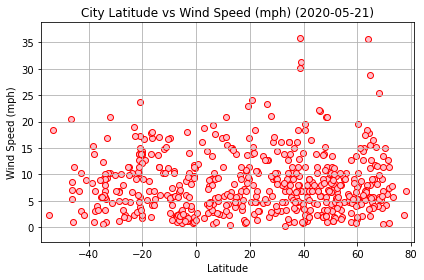

In [10]:
# Setting  X and Y Axis
x = weather_df['Lat']
y = weather_df['Wind Speed']

# Creating the Scatter Plot
plt.scatter( x , y, marker = 'o', facecolors = 'pink', edgecolors = 'red' )

# Setting Title and Labels for X and Y axis
plt.title('City Latitude vs Wind Speed (mph)'+ ' ('+ api_date + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Setting Limitation for X and Y axis
plt.xlim(min(x)-3, max(x)+3)
plt.ylim(min(y)-3, max(y)+3)

# Setting the grid and layout and saving the plot
plt.grid()
plt.tight_layout()
plt.savefig('output_data/Plots/latitude_wind_speed_plot.png')
plt.show()

##### Explanation: There is almost no relation between Latitude and Wind Speed. Most of the cities in the time of pulling this info, have almost wind speed less than 25 mph and just a few ones are between 25 to 40 mph.

## Linear Regression

In [11]:
# Creating a function to create Linear Regression plots

def linear_regression(x_axis, y_axis, title, xlabel, ylabel, name):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print(f"The linear regression model between {xlabel} & {ylabel} is ({line_eq})")
    print(f"The R squard is ({rvalue})")
    
    # Creating the Scatter Plot
    plt.scatter(x_axis,y_axis, facecolor = 'gold', edgecolor = 'navy')

    # Creating the Line Plot
    plt.plot(x_axis,regress_values,"red", linewidth = 2)

    # Setting Title, X and Y labels
    plt.title(title+ '\n' + ' ('+ api_date + ')')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Printing the linear regression model on the plot
    plt.annotate(line_eq,(min(x_axis)+2,max(y_axis)-2),fontsize=14,color="red")
   
    # Setting Limitation for X and Y axis
    plt.xlim(min(x_axis)-1, max(x_axis)+1)
    plt.ylim(min(y_axis)-1, max(y_axis)+1)

    plt.grid()
    plt.tight_layout()
    plt.savefig(f'output_data/Plots/{name}.png')
    plt.show()

In [12]:
# Creating the Northern Hemisphere
northern_hemisphere = weather_df[weather_df.Lat >=0]

# Saving the DataFrame as CSV
northern_hemisphere.to_csv('output_data/CSV/northern_hemisphere_data.csv', header = True, index =False)

# Displaying the Northern Hemisphere DataFrame
northern_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
0,Barrow,90,US,1590020832,85,71.29,-156.79,23.00,12.75
2,George Town,20,MY,1590021219,88,5.41,100.34,82.40,4.70
3,Ranong,75,TH,1590021220,94,9.97,98.63,78.80,2.24
4,Saskylakh,99,RU,1590020810,92,71.92,114.08,34.47,0.74
6,Calpulalpan,40,MX,1590021228,35,19.58,-98.58,80.60,9.17
...,...,...,...,...,...,...,...,...,...
536,Yar-Sale,88,RU,1590022228,77,66.83,70.83,55.27,15.21
537,Washougal,90,US,1590022229,82,45.58,-122.35,57.20,6.93
539,Pacific Grove,1,US,1590022231,87,36.62,-121.92,60.01,1.01


In [13]:
# Creating the Southern Hemisphere
southern_hemisphere = weather_df[weather_df.Lat < 0]

# Saving the DataFrame as CSV
southern_hemisphere.to_csv('output_data/CSV/southern_hemisphere_data.csv', header = True, index =False)

# Displaying the Southern Hemisphere DataFrame
southern_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City_ID,,,,,,,,,
1,Lüderitz,0,NA,1590021217,28,-26.65,15.16,68.00,2.24
5,Hithadhoo,19,MV,1590020712,75,-0.60,73.08,84.06,11.30
10,Voh,93,NC,1590021233,61,-20.97,164.70,76.21,5.75
12,Saint-Pierre,75,RE,1590021237,64,-21.34,55.48,71.60,13.87
13,Busselton,0,AU,1590020587,67,-33.65,115.33,50.00,5.41
...,...,...,...,...,...,...,...,...,...
513,Port-Gentil,100,GA,1590022199,86,-0.72,8.78,79.41,9.37
518,Talcahuano,20,CL,1590022205,93,-36.72,-73.12,48.20,3.36
527,Santiago del Estero,43,AR,1590022216,52,-27.80,-64.26,70.83,10.00


### Another method of creating northern and southern hemispheres DataFrames
* By writting the for and iterrows, we can find the DataFrame of North_Hemisphere and South_Hemisphere. But after that I found an easy way only with one line of coding, so I made this one as command

In [14]:
# columns= ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
# northern_hemisphere = pd.DataFrame(columns = columns)
# southern_hemisphere = pd.DataFrame(columns = columns)

# for index , row in weather_df.iterrows():
#     if(row['Lat'] >= 0):
#         northern_hemisphere.loc[index, 'Lat']= row['Lat'] #greater than or equal to 0 degrees latitude
#         northern_hemisphere.loc[index, 'Lng']= row['Lng']
#         northern_hemisphere.loc[index, 'Max Temp']= row['Max Temp']
#         northern_hemisphere.loc[index, 'Humidity']= row['Humidity']
#         northern_hemisphere.loc[index, 'Cloudiness']= row['Cloudiness']
#         northern_hemisphere.loc[index, 'Wind Speed']= row['Wind Speed']
#     else:
#         southern_hemisphere.loc[index, 'Lat']= row['Lat'] #greater than or equal to 0 degrees latitude
#         southern_hemisphere.loc[index, 'Lng']= row['Lng']
#         southern_hemisphere.loc[index, 'Max Temp']= row['Max Temp']
#         southern_hemisphere.loc[index, 'Humidity']= row['Humidity']
#         southern_hemisphere.loc[index, 'Cloudiness']= row['Cloudiness']
#         southern_hemisphere.loc[index, 'Wind Speed']= row['Wind Speed']

# northern_hemisphere.head()
# northern_hemisphere.head()


#-------------------------------------------------------------------------------#
# Creating Northern Hemisphere DataFrames
# northern_hemisphere = pd.DataFrame({'Lat':north})
# final_northern_hemisphere = pd.merge(northern_hemisphere, weather_df, how='left', on= 'Lat')
# final_northern_hemisphere.to_csv('output_data/CSV/northern_hemisphere_data.csv')
# final_northern_hemisphere['City'].value_counts()

#-------------------------------------------------------------------------------#
# Creating Southern Hemisphere DataFrames
# southern_hemisphere = pd.DataFrame({'Lat':south})
# final_southern_hemisphere = pd.merge(southern_hemisphere, weather_df, how='left', on= 'Lat')
# final_southern_hemisphere.to_csv('output_data/CSV/southern_hemisphere_data.csv')
# final_southern_hemisphere



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model between Latitude & Max Temperature (F) is (y = -0.72x + 91.01)
The R squard is (-0.8299307838349045)


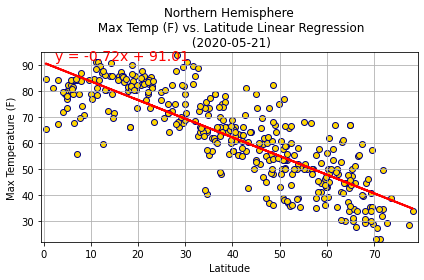

In [15]:
linear_regression(northern_hemisphere['Lat'],northern_hemisphere['Max Temp'],'Northern Hemisphere\n Max Temp (F) vs. Latitude Linear Regression','Latitude','Max Temperature (F)', 'northern_hemisphere_lat_temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression model between Latitude & Max Temperature (F) is (y = 0.63x + 81.62)
The R squard is (0.758951440824393)


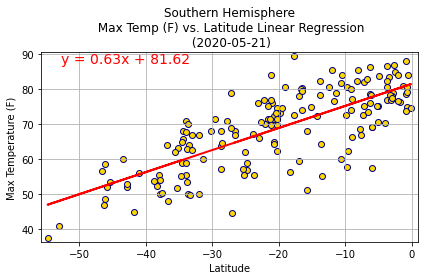

In [16]:
linear_regression(southern_hemisphere['Lat'],southern_hemisphere['Max Temp'],'Southern Hemisphere\n Max Temp (F) vs. Latitude Linear Regression','Latitude','Max Temperature (F)', 'southern_hemisphere_lat_temp')

#### Explanation: 
##### In the Northern Hemisphere the slope of the linear regression is negative which means when the latitude is increasing and being close to the north pole, the temperature is lower and when it is near the equator, it is higher.
##### In the Southern Hemisphere, the slope is positive. Slopes are almost the same amount, one negative and one positive!
##### Also based on the rvalues, -0.83 is Strong Negative Correlation for the Northern Hemisphere and 0.76 is Strong Positive Correlation for Southern Hemisphere as well.
##### We can say that there is a strong correlation between Latitude and Temperature in both hemispheres.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model between Latitude & Humidity (%) is (y = 0.04x + 65.76)
The R squard is (0.03689256194590428)


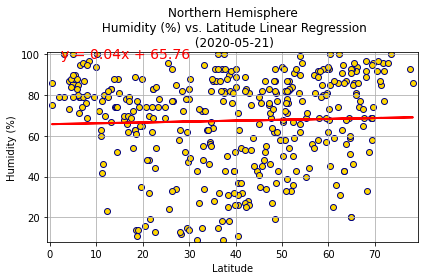

In [17]:
linear_regression(northern_hemisphere['Lat'],northern_hemisphere['Humidity'],'Northern Hemisphere\n Humidity (%) vs. Latitude Linear Regression','Latitude','Humidity (%)', 'northern_hemisphere_lat_humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression model between Latitude & Humidity (%) is (y = 0.38x + 80.68)
The R squard is (0.30604422879208404)


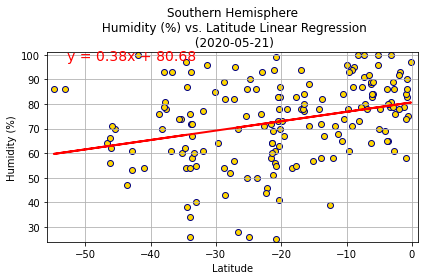

In [18]:
linear_regression(southern_hemisphere['Lat'],southern_hemisphere['Humidity'],'Southern Hemisphere\n Humidity (%) vs. Latitude Linear Regression','Latitude','Humidity (%)', 'southern_hemisphere_lat_humidity')

#### Explanation: 
##### rvalue is 0.04 for Northern Hemisphere which is almost none correlation and 0.31 for Southern Hemisphere which is week correlation.
##### There are different cities with different percentage of humidity around a given latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model between Latitude & Cloudiness (%) is (y = 0.15x + 44.01)
The R squard is (0.06921507876063021)


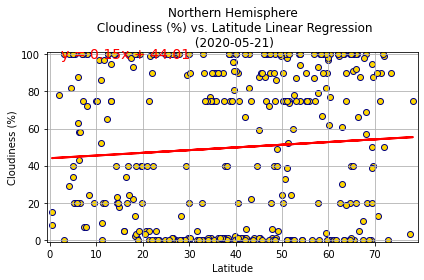

In [19]:
linear_regression(northern_hemisphere['Lat'],northern_hemisphere['Cloudiness'],'Northern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression','Latitude','Cloudiness (%)', 'northern_hemisphere_lat_cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression model between Latitude & Cloudiness (%) is (y = -0.21x + 37.65)
The R squard is (-0.06914903229735314)


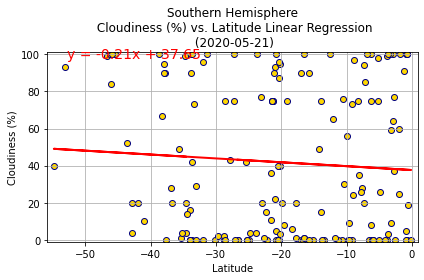

In [20]:
linear_regression(southern_hemisphere['Lat'],southern_hemisphere['Cloudiness'],'Southern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression','Latitude','Cloudiness (%)', 'southern_hemisphere_lat_cloudiness')

#### Explanation:
##### As expected in both hemispheres the amount of rvalue is near 0  which shows almost None or Very Very Weak Correlation between Latitude and Cloudiness.
##### It is 0.07 for Northern Hemisphere and -0.07 for Southern Hemisphere.
##### There are different cities with different percentage of Cloudiness around a given latitude and cities are scattered all over the plot with a different percentage of cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model between Latitude & Wind Speed (mph) is (y = -0.0x + 8.37)
The R squard is (-0.002668426179736839)


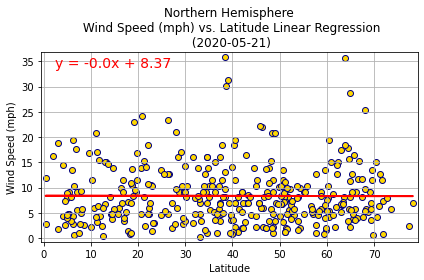

In [21]:
linear_regression(northern_hemisphere['Lat'],northern_hemisphere['Wind Speed'],'Northern Hemisphere\n Wind Speed (mph) vs. Latitude Linear Regression','Latitude','Wind Speed (mph)', 'northern_hemisphere_lat_wind_speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression model between Latitude & Wind Speed (mph) is (y = -0.05x + 6.96)
The R squard is (-0.12447645012330678)


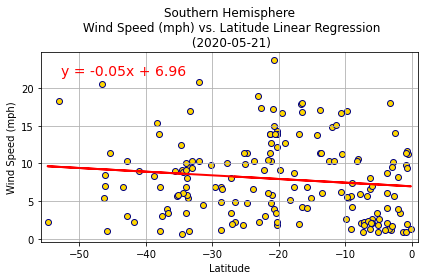

In [22]:
linear_regression(southern_hemisphere['Lat'],southern_hemisphere['Wind Speed'],'Southern Hemisphere\n Wind Speed (mph) vs. Latitude Linear Regression','Latitude','Wind Speed (mph)', 'southern_hemisphere_lat_wind_speed')

#### Explanation:
##### The slope of linear regression on northern hemispheres is 0 so the line plot is almost a straight line.
##### It means that in this time of the year, there are not big differences between the wind speeds in those cities and mostly are below 25 mph.
##### The amount of rvalue is 0 for the North Hemisphere which shows None Correlation between Latitude and Wind Speed as we expected and it is -0.12 for southern hemisphere which shows no or so week correlation as well.
##### In the Southern Hemisphere all the wind speeds are less than 25mph.